# Apriori Extra
## Minh Nguyen - 2069407

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
dataset = ['ACDFG','ABCDF','CDE','ADF','ACDEF','BCDEFG']

oht = TransactionEncoder()

oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print(df)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)

       A      B      C     D      E      F      G
0   True  False   True  True  False   True   True
1   True   True   True  True  False   True  False
2  False  False   True  True   True  False  False
3   True  False  False  True  False   True  False
4   True  False   True  True   True   True  False
5  False   True   True  True   True   True   True
     support   itemsets
0   0.666667        (A)
1   0.833333        (C)
2   1.000000        (D)
3   0.833333        (F)
4   0.666667     (D, A)
5   0.666667     (F, A)
6   0.833333     (D, C)
7   0.666667     (C, F)
8   0.833333     (D, F)
9   0.666667  (D, F, A)
10  0.666667  (D, C, F)


In [3]:
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0         (F)         (A)            0.833333            0.666667  0.666667   
1         (A)         (F)            0.666667            0.833333  0.666667   
2      (D, F)         (A)            0.833333            0.666667  0.666667   
3      (D, A)         (F)            0.666667            0.833333  0.666667   
4         (F)      (D, A)            0.833333            0.666667  0.666667   
5         (A)      (D, F)            0.666667            0.833333  0.666667   

   confidence  lift  leverage  conviction  zhangs_metric  
0         0.8   1.2  0.111111    1.666667            1.0  
1         1.0   1.2  0.111111         inf            0.5  
2         0.8   1.2  0.111111    1.666667            1.0  
3         1.0   1.2  0.111111         inf            0.5  
4         0.8   1.2  0.111111    1.666667            1.0  
5         1.0   1.2  0.111111         inf            0.5  


In [9]:
support = rules['support'].values
confidence = rules['confidence'].values
print(support)
print(confidence)

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
[0.8 1.  0.8 1.  0.8 1. ]


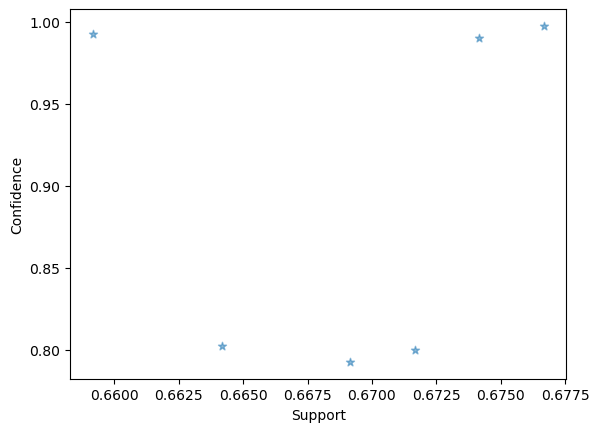

In [10]:
import random
import matplotlib.pyplot as plt

for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
    
plt.scatter(support, confidence, alpha = 0.5, marker = "*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()